*  Python for Data Analysis - Modulo 4
*  Alumno: José Ovalle Alvarado
*  Matrícula:A01150742
*  Model development

In [54]:
# Objetivos de aprendizaje:
# Simple and multiple linear regression
# Model evaluation using visualization
# Polynomial Regression and pipelines
# R squared and MSE for in sample evaluation
# Prediction and Decision MAKING


In [55]:
# Model, mathematical equation to predict a value given one or more other values

# input - model - dependent value prediction

# less error is more accuracy

# model to determine the price of the car depending on different feautres


In [56]:
# Simple linear
# Multiple linear regression
# Polynomial regression

Linear regression and multiple regression

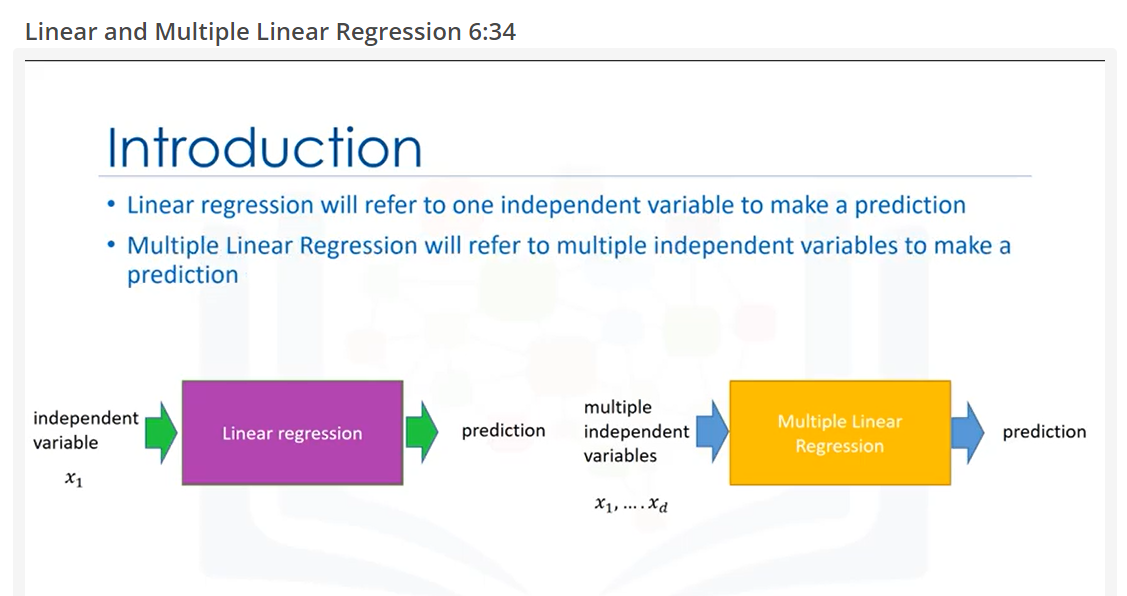

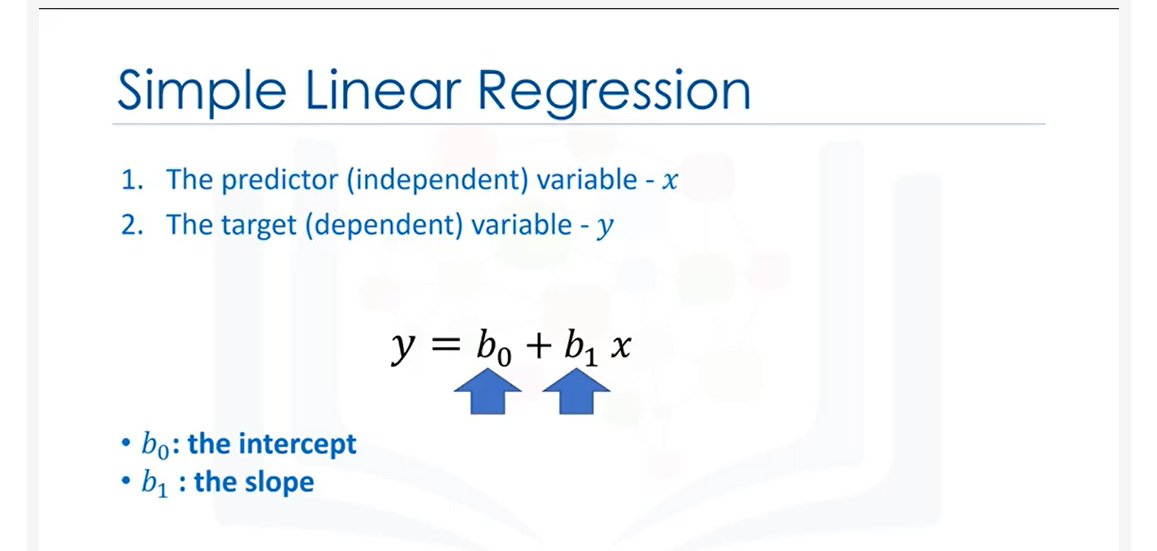

In [57]:
# assume linear regression to determine the price of the car depending on different features

# we take data points, train the model and fit the model

# results are stored in coefficient

# the coefficientes help make predictions

In [58]:
# noise and distribution

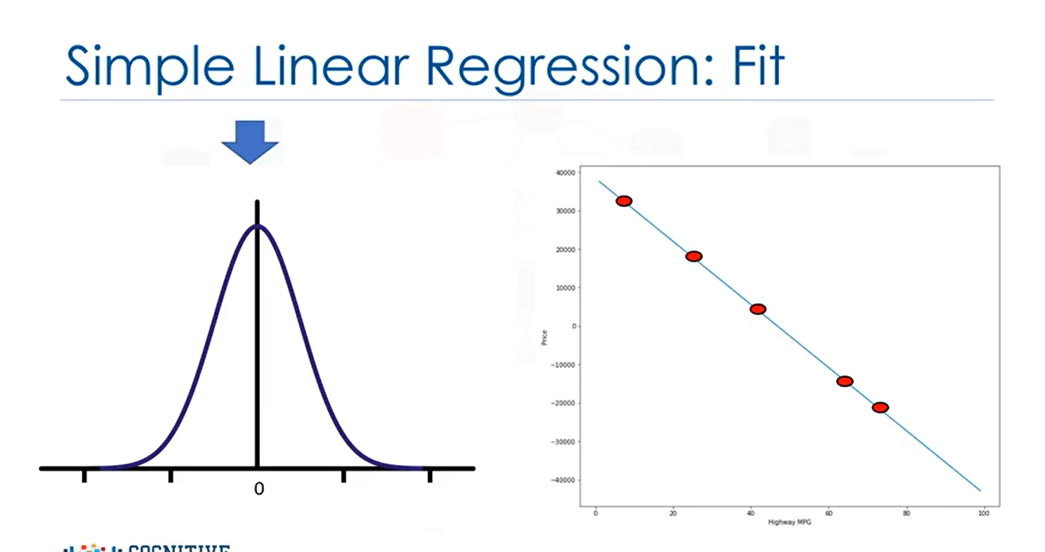

In [59]:
# fitting a model

# Import linear_model from schikit - learn
from sklearn.linear_model import LinearRegression

# Create alinear regression object using the constructor:
lm = LinearRegression() #this called the constructor object from laibrary sklearn.linear_model



# IMPORT DATA


In [60]:
# import pandas library
import pandas as pd
import numpy as np
# !pip install pyfetch

In [61]:
async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [62]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [63]:
df = pd.read_csv(path)
df.head()

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   
2                9.0       154.0    5000.0       19          26  16500.0   
3               10.0       102.0    5500.0       24          30  13950.0   
4                8.0       115.0    5500.0       18          22  17450.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  
2    12.368421             Medium       0    1  
3     9.791667             Medium       0    1  
4    13.055556             Medium       0    1  

[5 rows x 29 columns]

In [64]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [65]:
# define predictor variable and target variable

X = df[["highway-mpg"]]
y = df[["price"]]

In [66]:
X.head()

highway-mpg
0           27
1           27
2           26
3           30
4           22

In [67]:
y.head()

price
0  13495.0
1  16500.0
2  16500.0
3  13950.0
4  17450.0

In [68]:
# use lm.fit(X,y) to fit the model
lm.fit(X,y)

# obtain prediciton

yhat = lm.predict(X)

In [69]:
# regression attribut
print(lm.intercept_)
print(lm.coef_)


[38423.30585816]
[[-821.73337832]]


Multiple Linear Regreesion

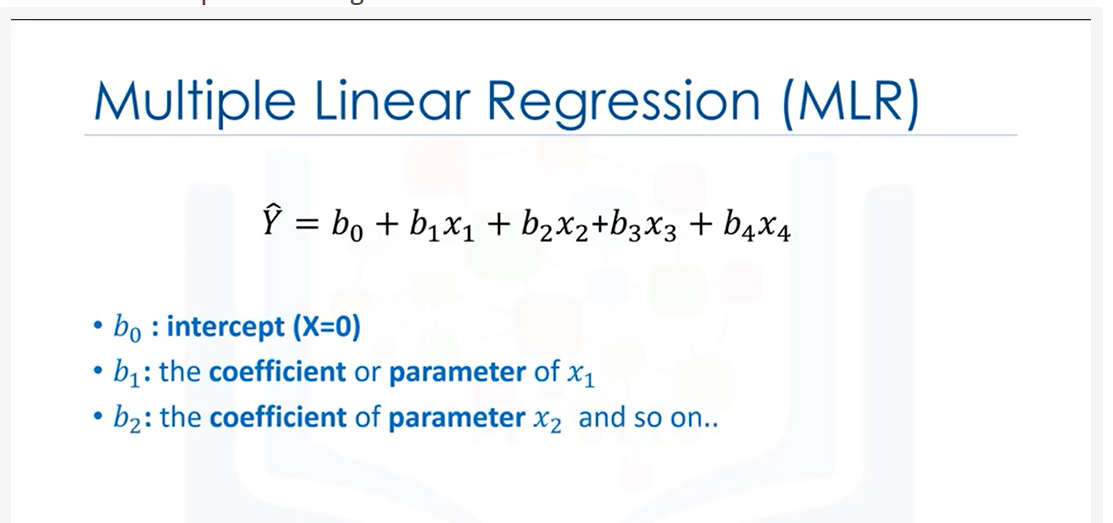

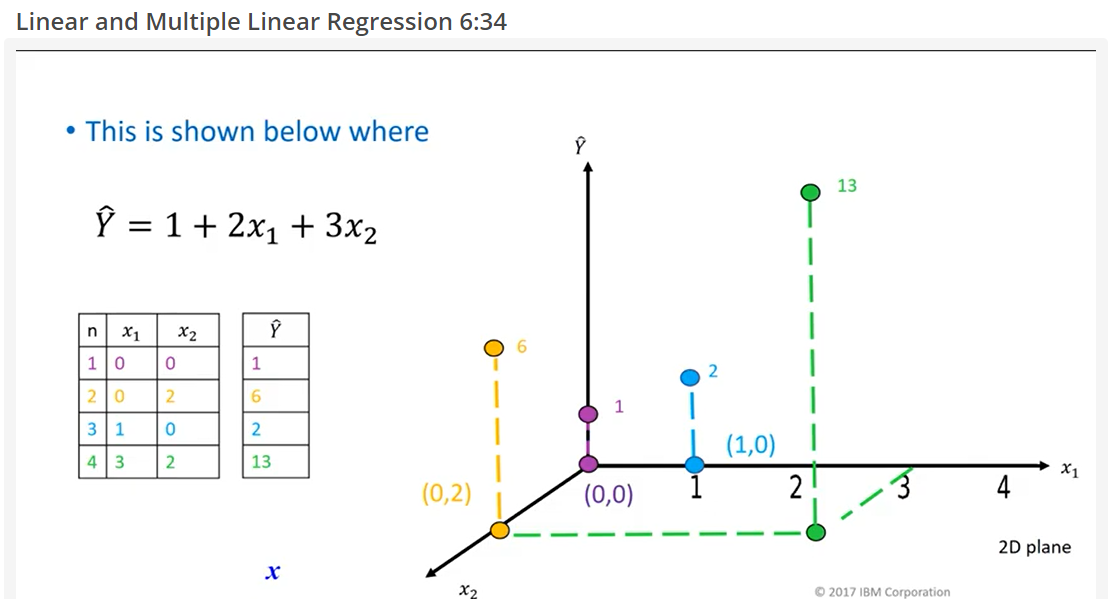

In [70]:
# extract the 4 predictor variables and store them in the variable df z
features = ["horsepower","curb-weight","engine-size","highway-mpg"]
z = df[features]
z.head()

horsepower  curb-weight  engine-size  highway-mpg
0       111.0         2548          130           27
1       111.0         2548          130           27
2       154.0         2823          152           26
3       102.0         2337          109           30
4       115.0         2824          136           22

In [71]:
# fitting model to the 4 predictor variables

lm.fit(z,df["price"])
yhat = lm.predict(z)

# regression attribut
print(lm.intercept_)
print(lm.coef_)


-15806.62462632922
[53.49574423  4.70770099 81.53026382 36.05748882]


Model Evaluation using visualization

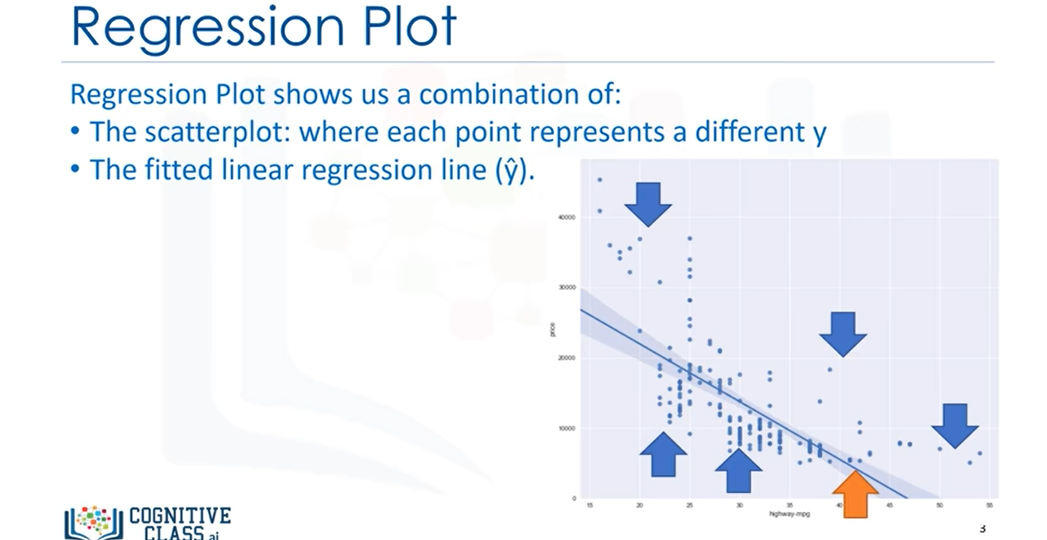

In [72]:
# Regression plot


(0.0, 48178.827150039695)

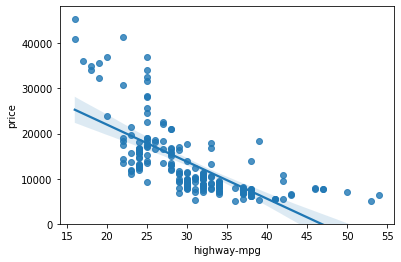

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.regplot(x= "highway-mpg", y = "price", data = df)
plt.ylim(0,)

In [74]:
# Residual plot

# predicted value vs actual value

# results should have a zero mean and mean


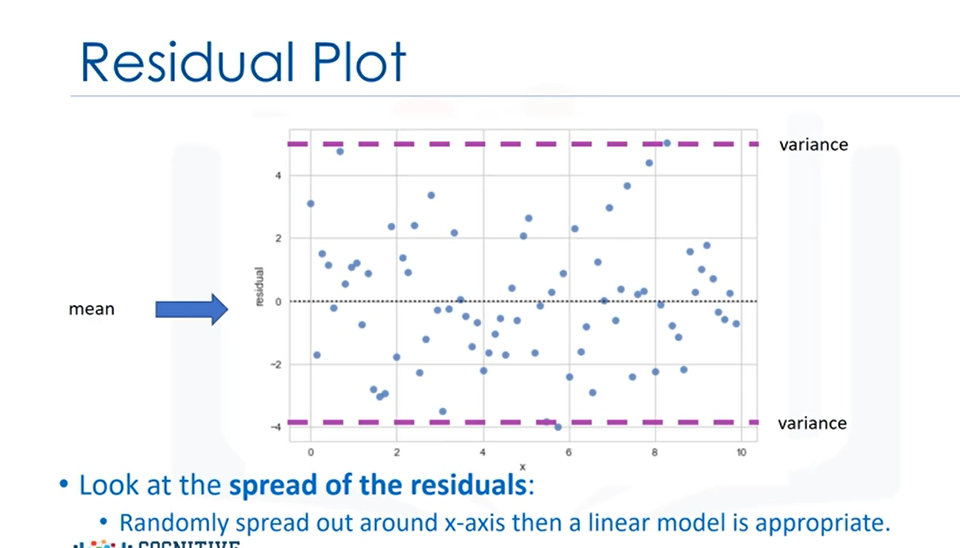

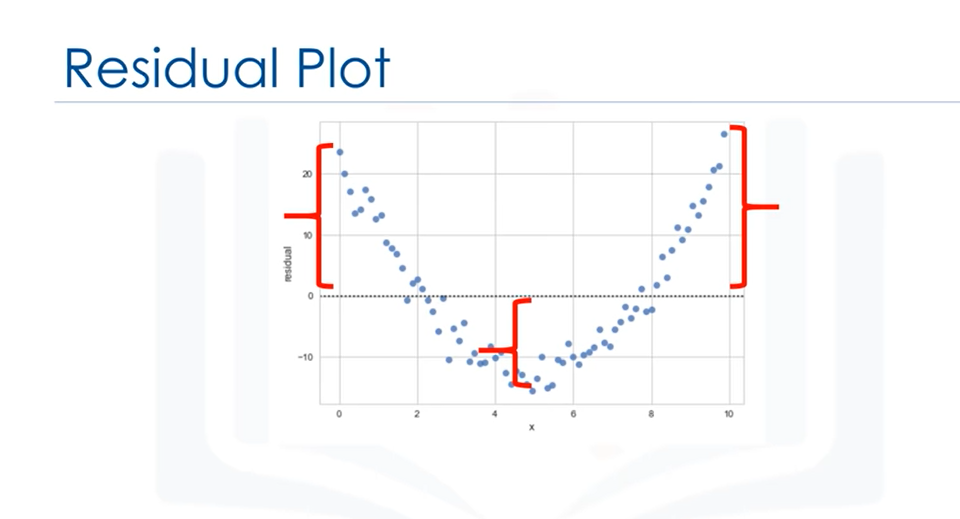

In [75]:
# if scatter plot of residuals doesn't show normally distributed errors, it means
# the linear regression error asumption is incorrect

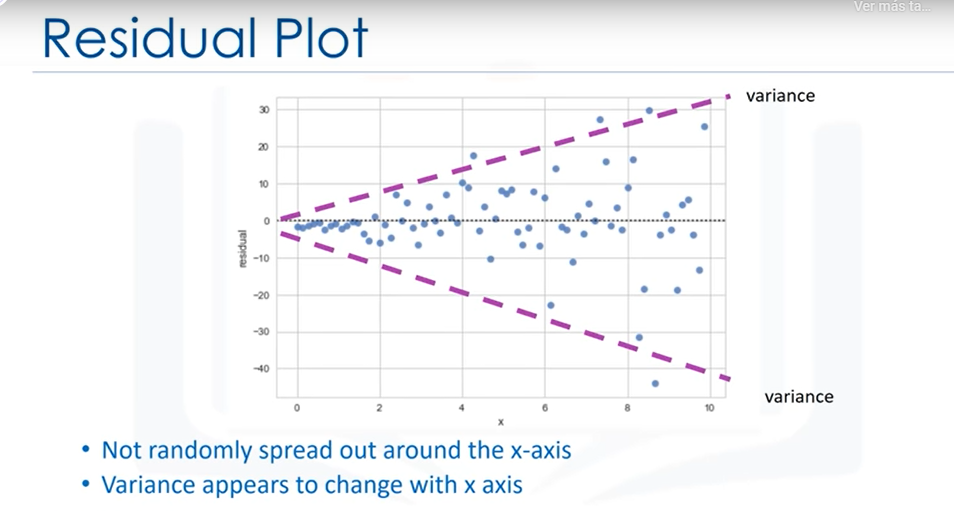

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


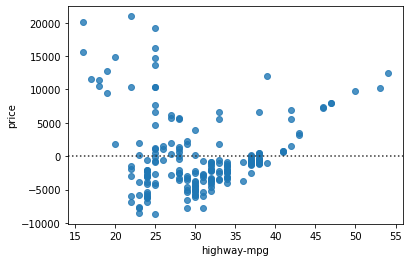

In [76]:
sns.residplot(df["highway-mpg"], df["price"])
plt.show()

In [77]:
# distribution plots

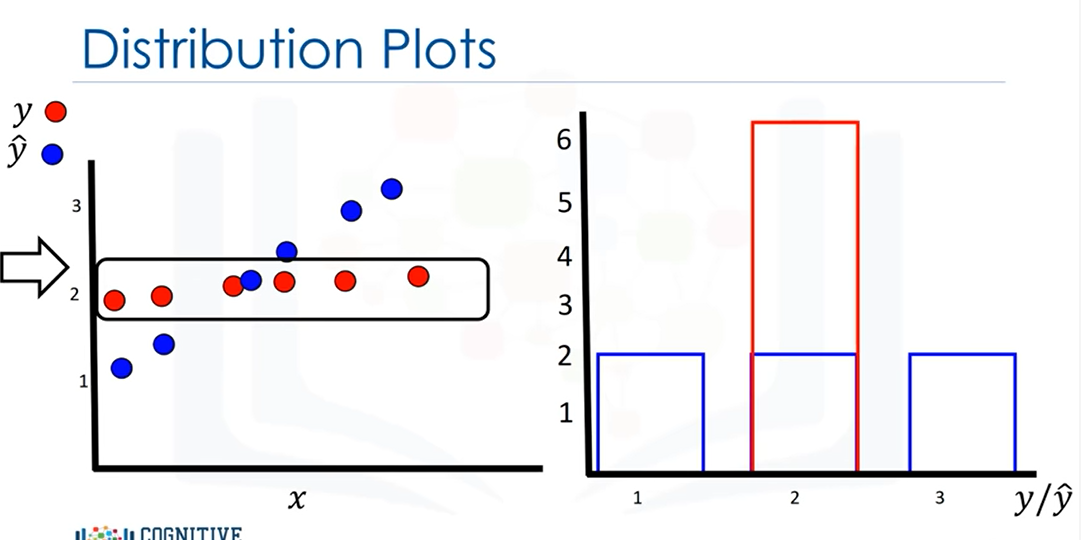

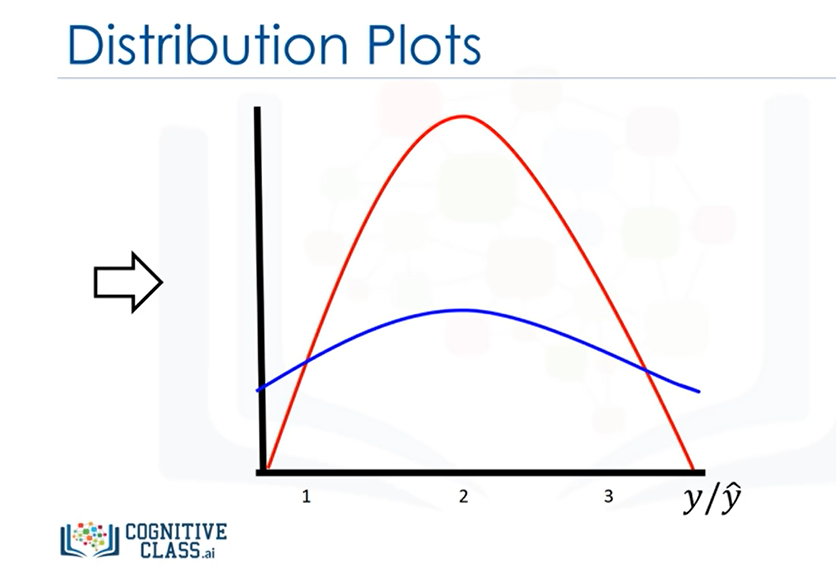

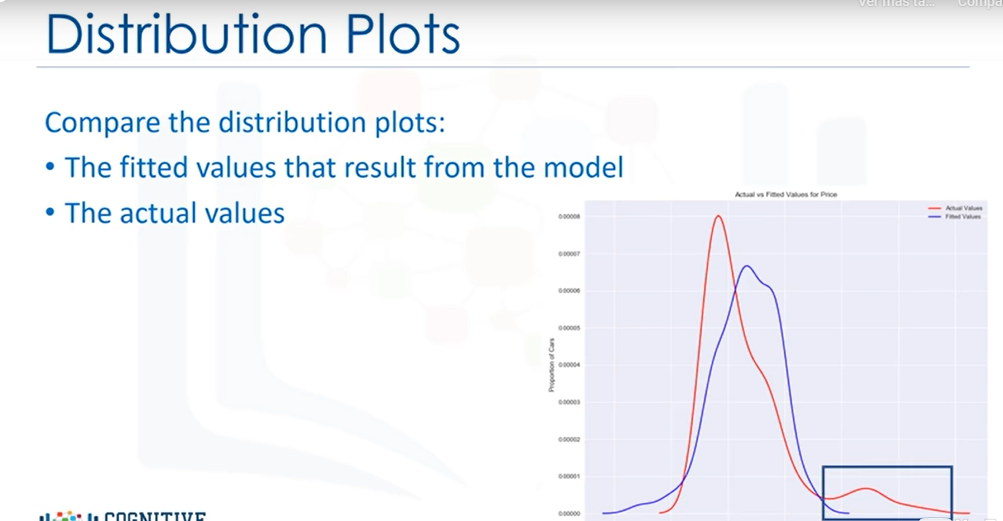

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


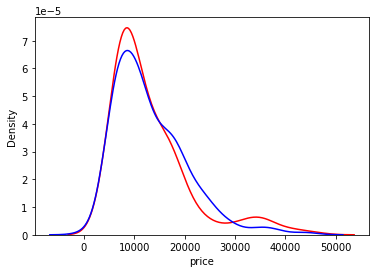

In [78]:
# hist = False to avoid showing histogram

ax1 = sns.distplot(df["price"], hist = False, color = "r", label = "Actual value")
sns.distplot(yhat, hist = False, color = "b", label = "Fitted Values", ax = ax1);

Polynomial Regression and Piplines

In [79]:
# Polynomial Regression

# adding quadratic, cubic order

# quadratic model

# cubic model

# high order 4h or more order polynomial


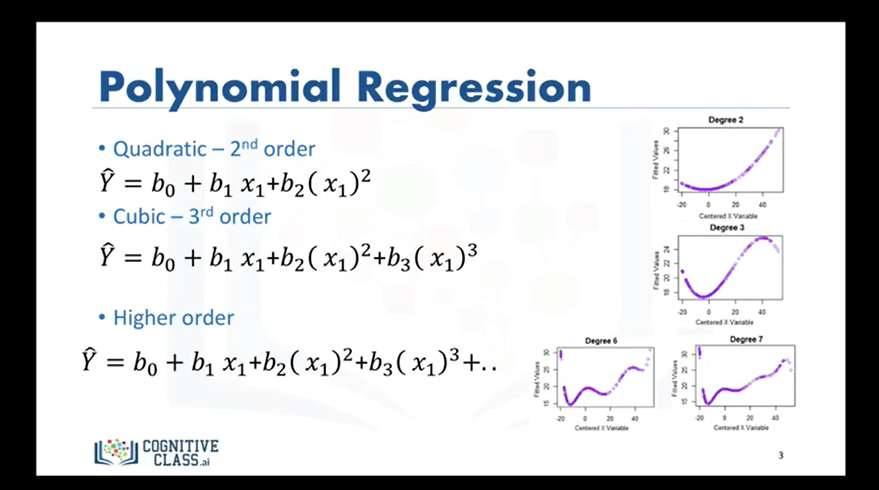

In [99]:
# polynomial regression

x = df['highway-mpg']
y = df['price']


# 3 terms have been added to the polynomial just for feature highway -mpg
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)


        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [100]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

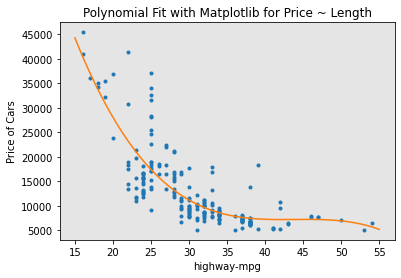

In [101]:
PlotPolly(p, x, y, 'highway-mpg')

In [81]:
# preprocessing library

from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree =2, include_bias = False)

x_polly = pr.fit_transform(df[["horsepower","curb-weight"]])

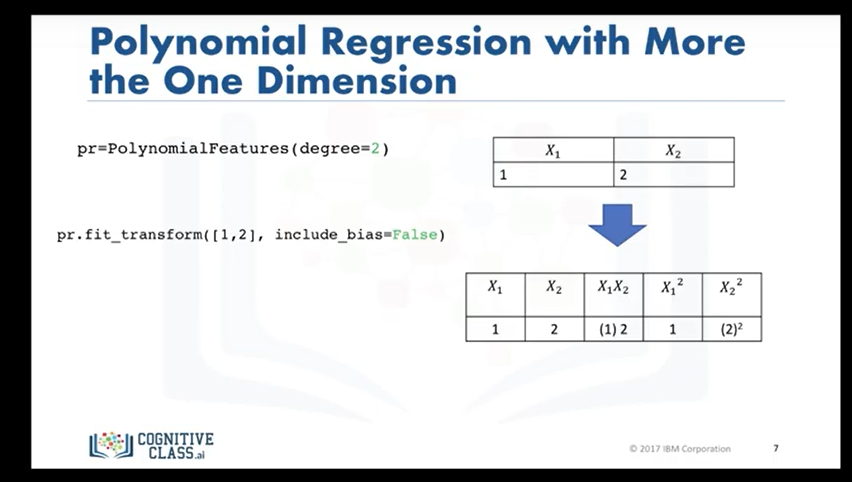

In [82]:
# pre processing
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(df[["horsepower","curb-weight"]])
x_scale = scale.transform(df[["horsepower","curb-weight"]])

In [83]:
# pipelines
# normalization - polynomial - linear regression

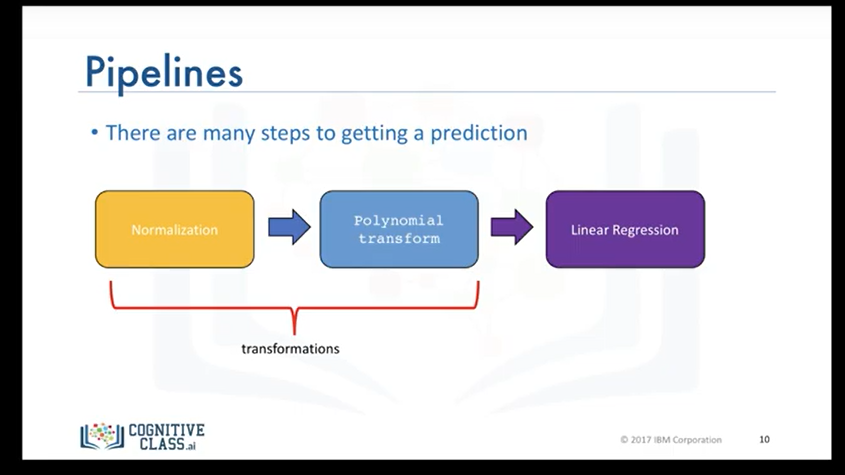

In [104]:
# pre processing
from sklearn.pipeline import Pipeline

#pipeline constructor

# tuple creation
Input = [('scaler',StandardScaler()), ('polynomial',PolynomialFeatures(degree=2)), ('model', LinearRegression())]

# this it the pipeline object
pipe = Pipeline(Input)


In [109]:
# trrain the pipleine object
pipe.fit(df[["horsepower","curb-weight","engine-size","highway-mpg"]],y)
yhat = pipe.predict(df[["horsepower","curb-weight","engine-size","highway-mpg"]])


Measure for In - Sample evaluation

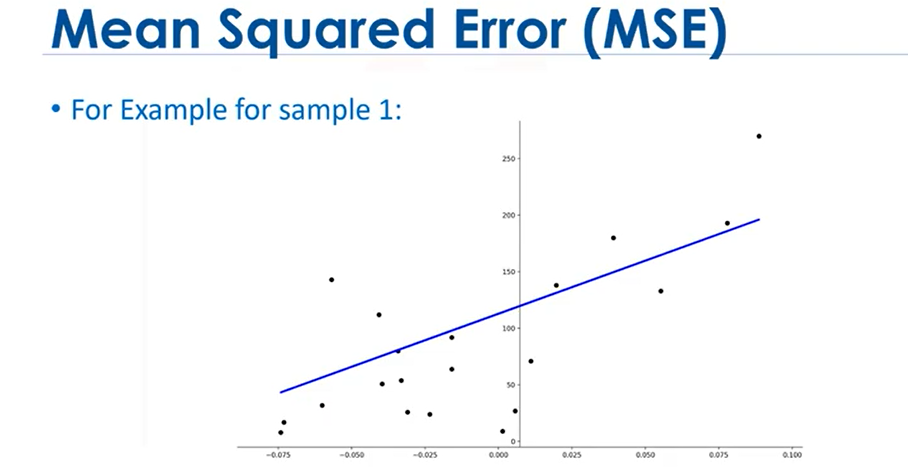

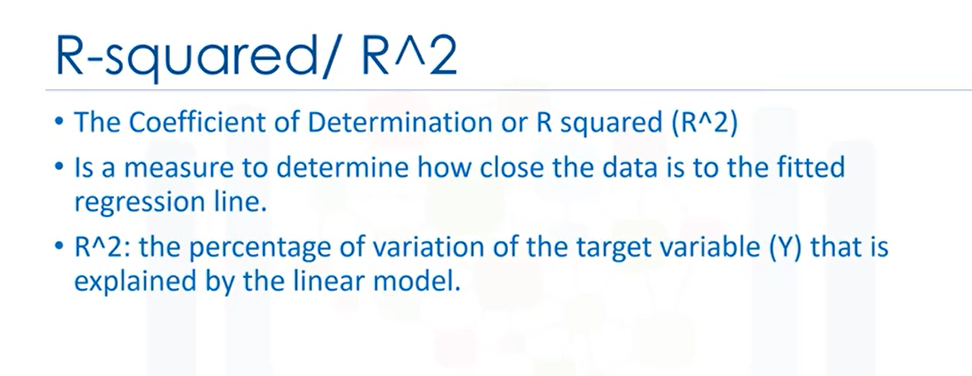

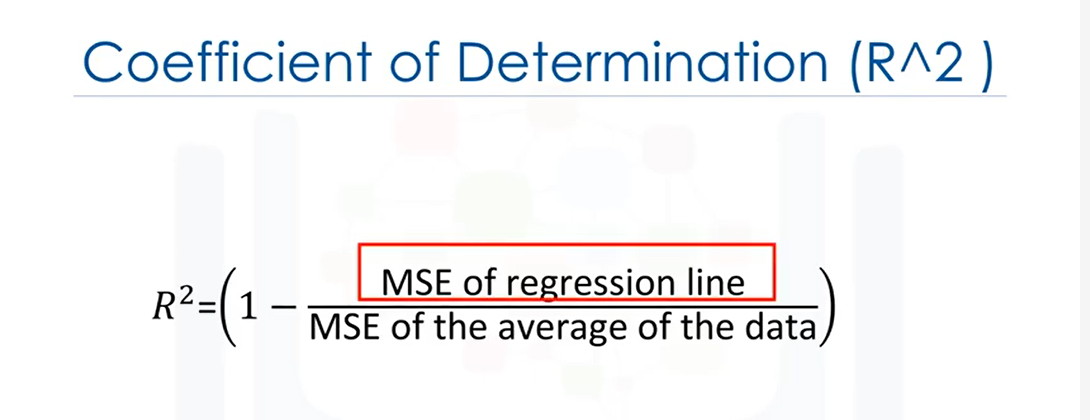

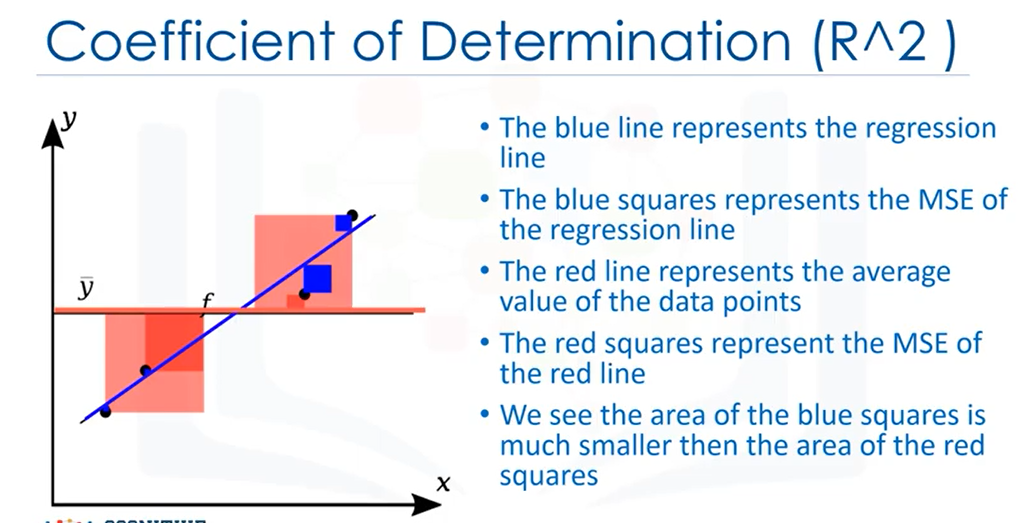

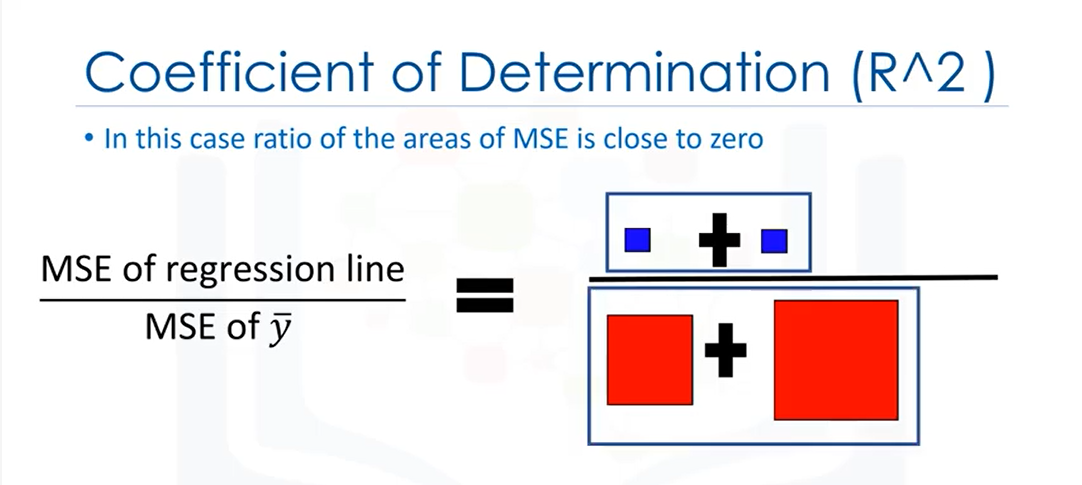

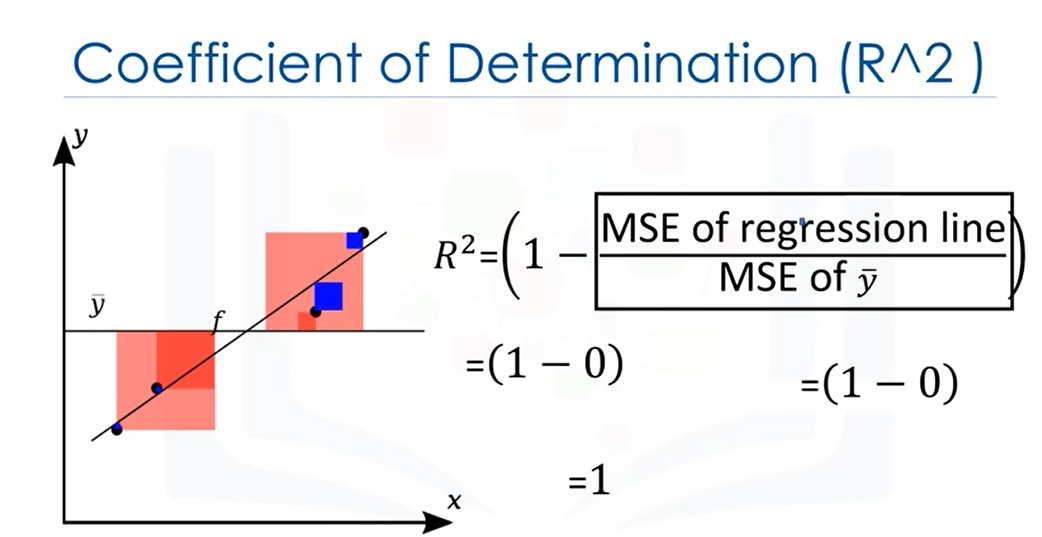

In [95]:
from sklearn.metrics import mean_squared_error

# mse
mean_squared_error(df["price"], yhat)


11980366.87072649

In [97]:
# r2
X = df[["highway-mpg"]]
y = df[["price"]]
lm.fit(X,y)
lm.score(X,y)

#aprox 49% of the variation is explained by the model

0.4965911884339176

Prediction and Decision Making

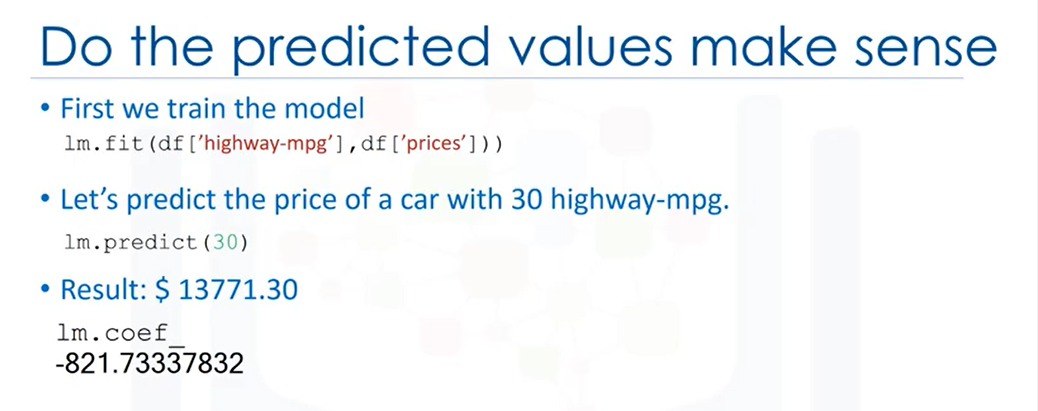

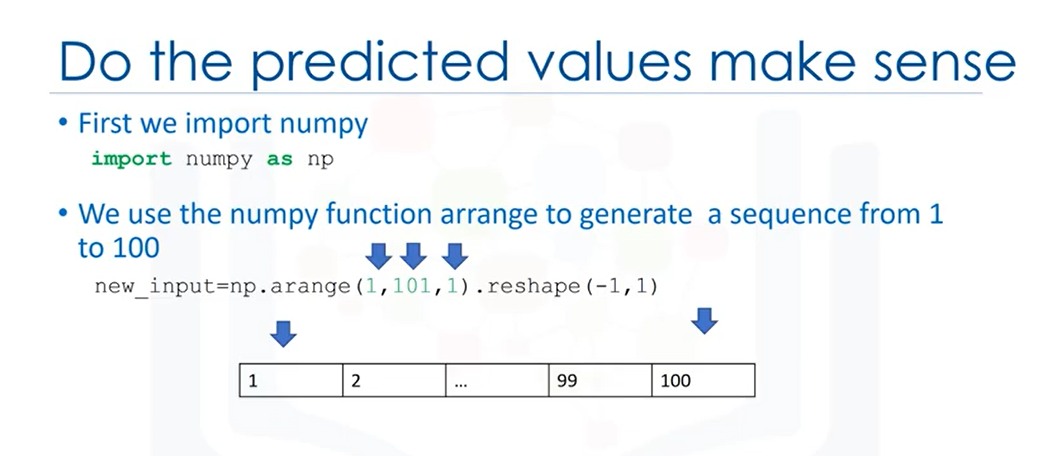

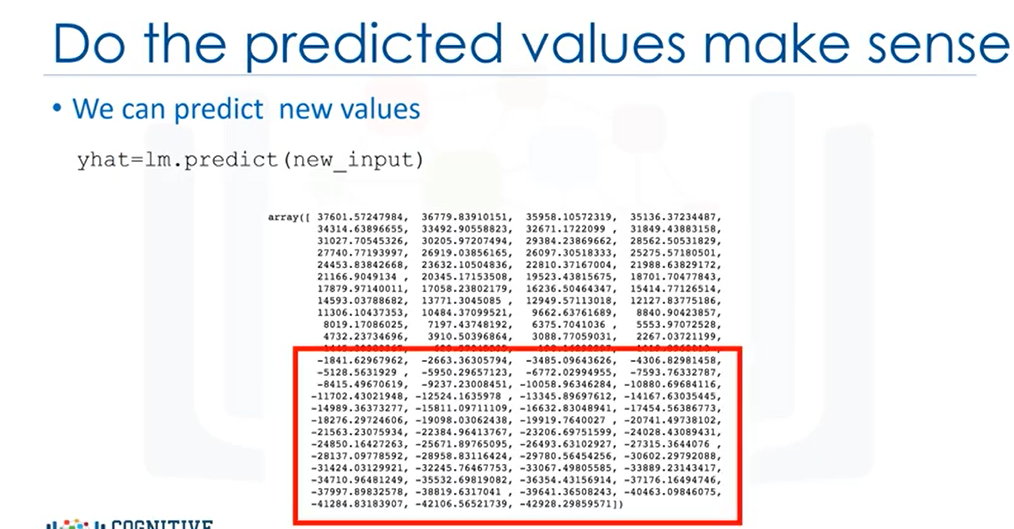

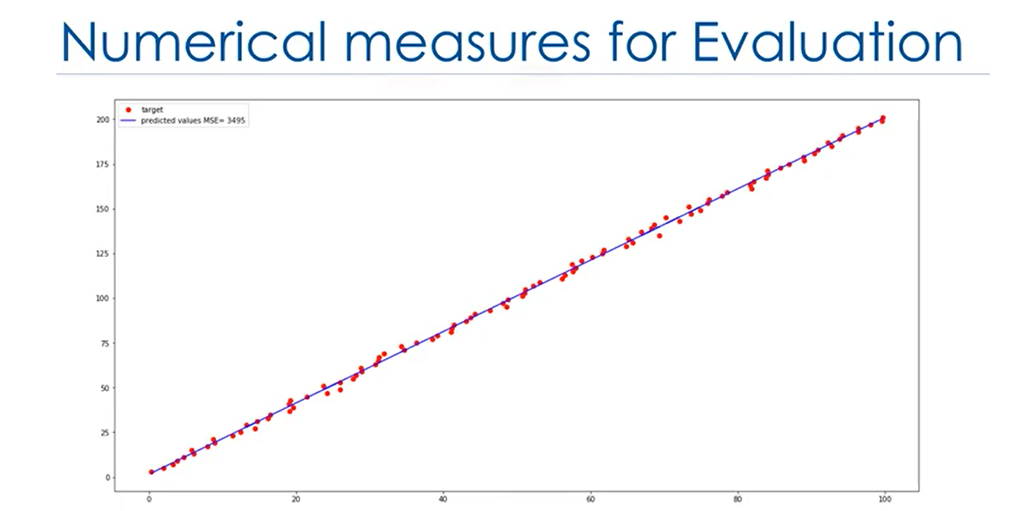

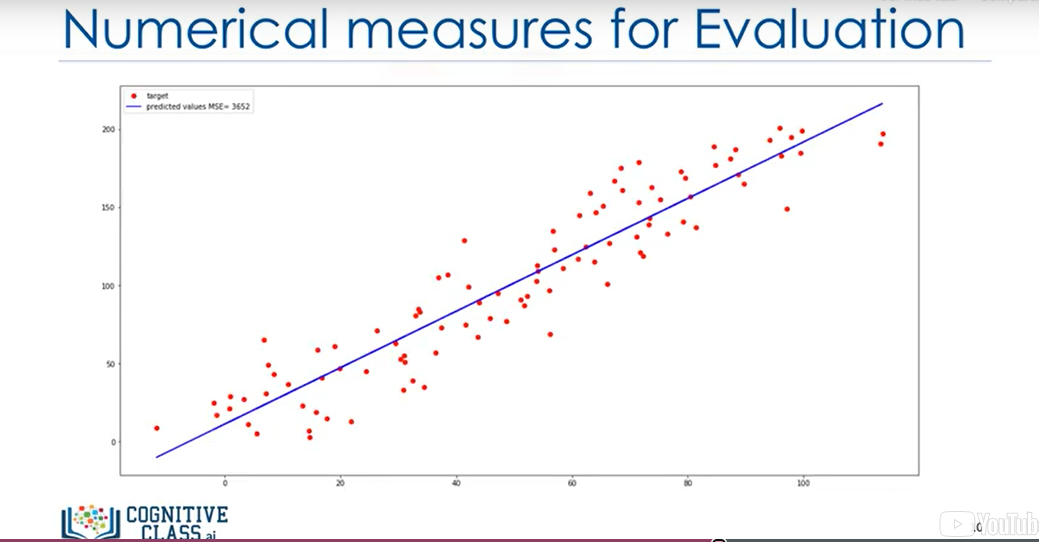

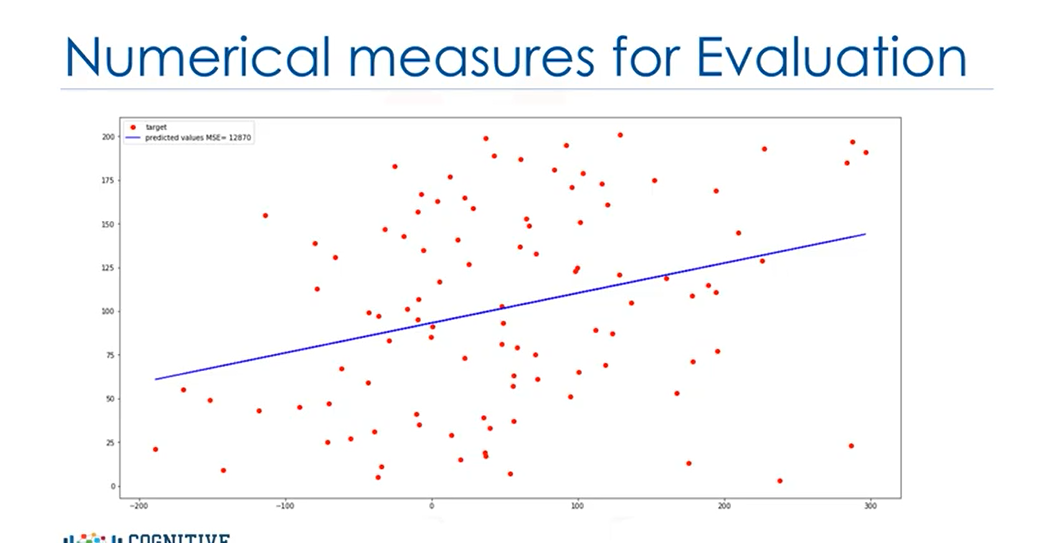

Progreso Curso

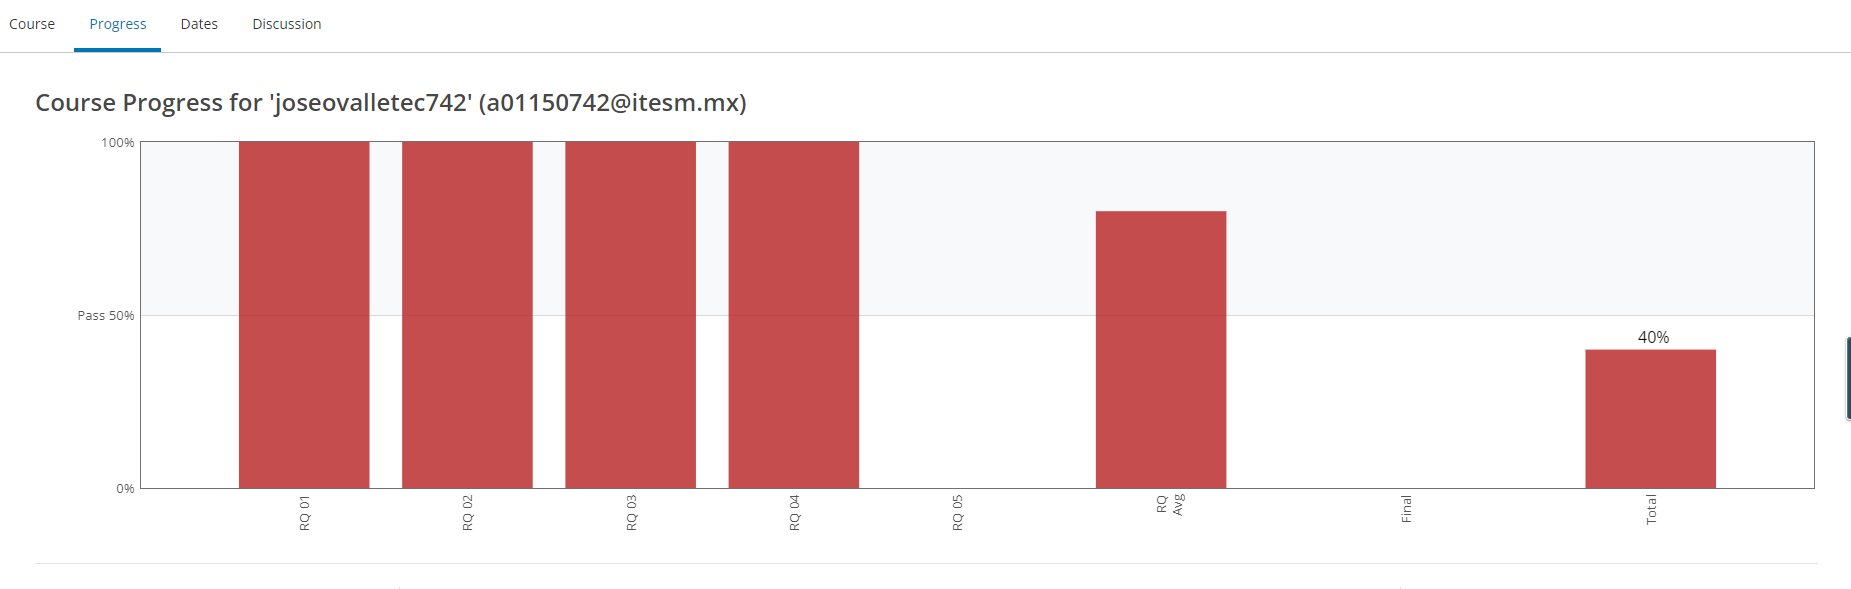